In [95]:
import numpy as np
import pandas as pd

In [96]:
data = pd.read_csv('Data - A1.csv')
data.head()

,X,Y
0,0.987988,5.098368
1,0.719720,2.516654
2,-0.403403,0.337961
3,0.107107,0.737320
4,0.345345,-0.780955


# Preprocessing

In [97]:
mean_x = data['X'].mean()
std_x = data['X'].std()

min_x = min(data['X'])
max_x = max(data['X'])

print(f'Mean: {mean_x} | Stddev: {std_x} | Min: {min_x} | Max: {max_x}')

Mean: -4.440892098500626e-18 | Stddev: 0.5782170892807795 | Min: -1.0 | Max: 1.0


In [98]:
data['X'] = (data['X'] - mean_x) / (std_x)
# data['X'] = (data['X'] - min_x) / (max_x - min_x)
data.head()

,X,Y
0,1.708680,5.098368
1,1.244722,2.516654
2,-0.697668,0.337961
3,0.185237,0.737320
4,0.597259,-0.780955


In [99]:
data = data.sample(frac=1, random_state=42)

split_frac = int(0.8 * len(data))

train_data = data[:split_frac]
test_data = data[split_frac:]

In [100]:
print(f'TotalLen: {len(data)} | TrainLen: {len(train_data)} | TestLen: {len(test_data)}')

TotalLen: 1000 | TrainLen: 800 | TestLen: 200


# Polynomial Regression

In [101]:
def create_pol(X, degree):
    return np.column_stack([X ** i for i in range(1, degree + 1)])

X = np.array([1, 2, 3])
print(create_pol(X, 2))

[[1 1]
 [2 4]
 [3 9]]


In [102]:
degrees = [_ for _ in range(1, 10)]
print(degrees)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [103]:
X_train = train_data['X'].values
X_test = test_data['X'].values
y_train = train_data['Y'].values
y_test = test_data['Y'].values

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train[:5], y_train[:5]

(800,) (200,) (800,) (200,)


(array([-1.4732388 , -1.47670117,  0.27525848, -1.06814141, -0.37912961]),
 array([-1.07024892, -2.72489045,  2.14920693,  0.32468615,  1.52515015]))

## Training

In [156]:
lr, num_itrs = 0.0005, 500

mses = []
ws, bs = [], []

for degree in degrees:
    X_pol = create_pol(X_train, degree)    
    print(f'Shape of X_pol: {X_pol.shape}')

    w = np.zeros(X_pol.shape[1])
    print(f'Shape of w: {w.shape}')
    
    b = 0
    
    for _ in range(num_itrs):
        prediction = X_pol.dot(w) + b
        gradient_w = (1/len(train_data)) * X_pol.T.dot(prediction - y_train)
        gradient_b = (1/len(train_data)) * np.sum(prediction - y_train)
        
        w -= lr * gradient_w
        b -= lr * gradient_b
        
    ws.append(w)
    bs.append(b)
        
    mse = np.mean((X_pol.dot(w) + b - y_train)**2)
    mses.append(mse)

Shape of X_pol: (800, 1)
Shape of w: (1,)
Shape of X_pol: (800, 2)
Shape of w: (2,)
Shape of X_pol: (800, 3)
Shape of w: (3,)
Shape of X_pol: (800, 4)
Shape of w: (4,)
Shape of X_pol: (800, 5)
Shape of w: (5,)
Shape of X_pol: (800, 6)
Shape of w: (6,)
Shape of X_pol: (800, 7)
Shape of w: (7,)
Shape of X_pol: (800, 8)
Shape of w: (8,)
Shape of X_pol: (800, 9)
Shape of w: (9,)


In [157]:
mses

[3.091469093997325,
 2.839558992475379,
 1.5145141107299998,
 1.4855461620771258,
 1.3143959423191043,
 1.3561246756324652,
 1.438229782459283,
 1.4051944133144985,
 1.3217683149834796]

# Plot

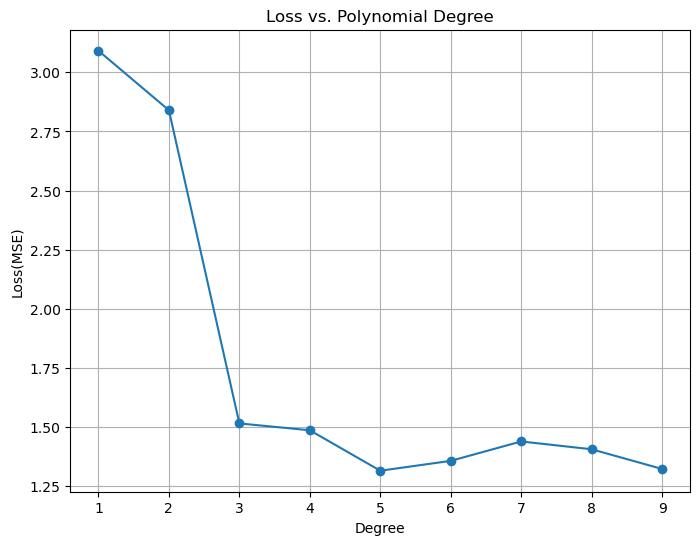

In [158]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(degrees, mses, marker='o', linestyle='-')
plt.title("Loss vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Loss(MSE)")
plt.grid(True)

plt.show()

In [159]:
map = {}

for idx, mse in enumerate(mses):
    deg = idx + 1
    map[deg] = mse

In [160]:
sorted_map = dict(sorted(map.items(), key=lambda x: x[1]))
sorted_map

{5: 1.3143959423191043,
 9: 1.3217683149834796,
 6: 1.3561246756324652,
 8: 1.4051944133144985,
 7: 1.438229782459283,
 4: 1.4855461620771258,
 3: 1.5145141107299998,
 2: 2.839558992475379,
 1: 3.091469093997325}

In [161]:
best_degree = min(map, key=map.get)
print(f'The best degree for the polynomial regression is: {best_degree}')

The best degree for the polynomial regression is: 5


## Testing

In [162]:
ws

[array([0.30983944]),
 array([0.3085762, 0.2015414]),
 array([0.19992141, 0.19651823, 0.4434241 ]),
 array([0.19854347, 0.10753871, 0.44029312, 0.14925904]),
 array([0.07524581, 0.10563814, 0.12959514, 0.14387864, 0.24986877]),
 array([0.07554807, 0.07909101, 0.12990031, 0.0665546 , 0.2499054 ,
        0.03015494]),
 array([0.06917891, 0.08006527, 0.08781443, 0.06749498, 0.1029302 ,
        0.02985138, 0.06030519]),
 array([ 0.0691493 ,  0.08579792,  0.08778418,  0.08257589,  0.10292308,
         0.06981788,  0.06042621, -0.01991953]),
 array([ 0.07072985,  0.08558012,  0.09491137,  0.08229144,  0.12650523,
         0.06955795,  0.13217291, -0.01968064, -0.03193086])]

In [163]:
bs

[0.219362098138942,
 0.19370230762830634,
 0.19132976374900035,
 0.15375275375463168,
 0.15325997162560917,
 0.14676200791579103,
 0.14748913091103727,
 0.1495712875696646,
 0.149411899449812]

In [164]:
test_mses = []

for degree in degrees:
    X_pol = create_pol(X=X_test, degree=degree)
    
    prediction = X_pol.dot(ws[degree - 1]) + bs[degree - 1]
    
    testing_mse = np.mean((prediction - y_test) ** 2)
    
    test_mses.append(testing_mse)


In [165]:
test_mses

[2.8787188688785834,
 2.750764517341329,
 1.5151027132678183,
 1.5444877077022812,
 1.371147217200112,
 1.404072524318303,
 1.4841824714663534,
 1.4661083843146319,
 1.3912973238834143]

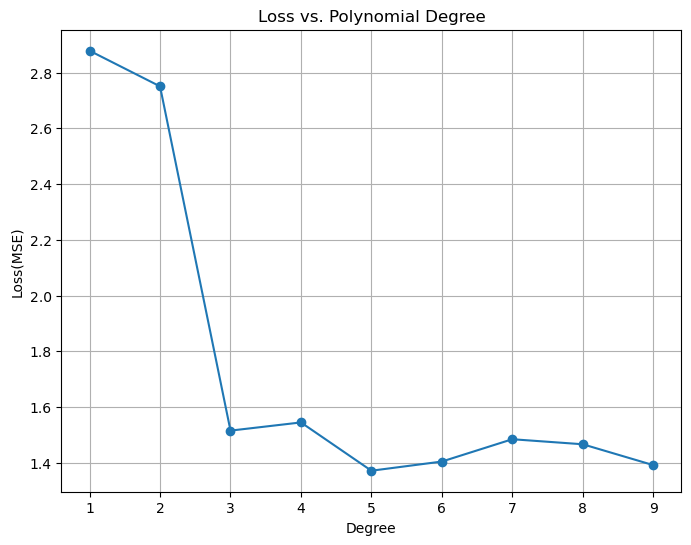

In [166]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, test_mses, marker='o', linestyle='-')
plt.title("Loss vs. Polynomial Degree")
plt.xlabel("Degree")
plt.ylabel("Loss(MSE)")
plt.grid(True)

plt.show()

In [167]:
map = {}

for idx, mse in enumerate(test_mses):
    deg = idx + 1
    map[deg] = mse
    
sorted_map = dict(sorted(map.items(), key=lambda x: x[1]))
sorted_map

{5: 1.371147217200112,
 9: 1.3912973238834143,
 6: 1.404072524318303,
 8: 1.4661083843146319,
 7: 1.4841824714663534,
 3: 1.5151027132678183,
 4: 1.5444877077022812,
 2: 2.750764517341329,
 1: 2.8787188688785834}

In [168]:
best_degree = min(map, key=map.get)
print(f'The best degree for the polynomial regression is: {best_degree}')

The best degree for the polynomial regression is: 5


In [169]:
w_best, b_best = ws[best_degree - 1], bs[best_degree - 1]
w_best, b_best, type(w_best)

(array([0.07524581, 0.10563814, 0.12959514, 0.14387864, 0.24986877]),
 0.15325997162560917,
 numpy.ndarray)

In [170]:
X_vals = data['X']*std_x + mean_x
X_vals = X_vals.values

coefficients = w_best

y_vals = np.zeros_like(X_vals)

for degree, coeff in enumerate(coefficients):
    y_vals += coeff * (X_vals ** (degree + 1))
    
y_vals += b_best

In [171]:
X_vals.shape, y_vals.shape, X_vals[:10], y_vals[:10], min(X_vals), max(X_vals)

((1000,),
 (1000,),
 array([-0.85185185, -0.85385385,  0.15915916, -0.61761762, -0.21921922,
        -0.13313313, -0.43543544, -0.14314314,  0.14914915, -0.37537538]),
 array([0.04939036, 0.04842579, 0.16855236, 0.11503143, 0.1406818 ,
        0.14484358, 0.13108629, 0.14431886, 0.16735241, 0.13403941]),
 -1.0,
 1.0)

In [172]:
X_vals = np.linspace(-1, 1, 100)
y_vals = b_best + np.polyval(coefficients, X_vals)

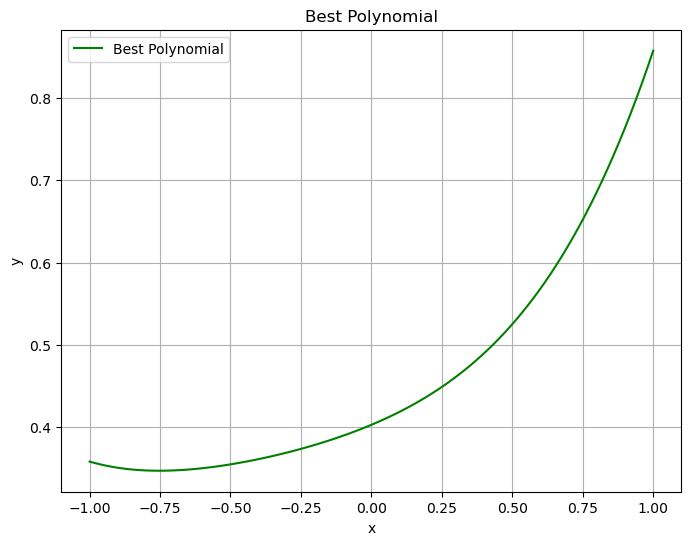

In [173]:
plt.figure(figsize=(8, 6))
plt.plot(X_vals, y_vals, label='Best Polynomial', color='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Polynomial')
plt.legend()
plt.grid(True)
plt.show()

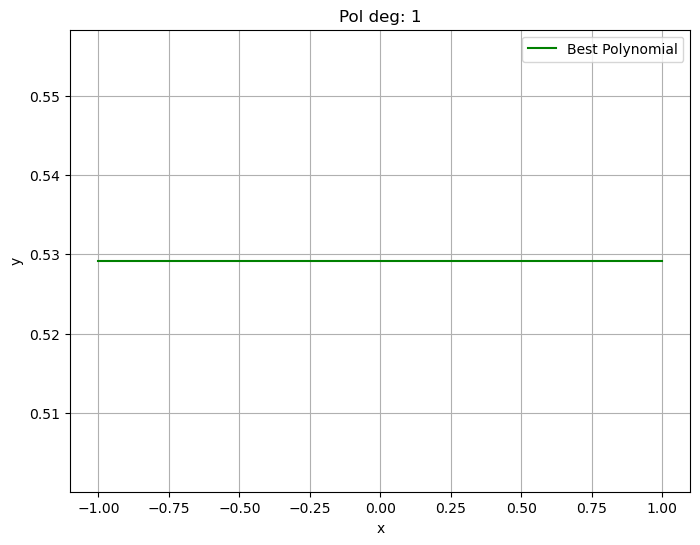

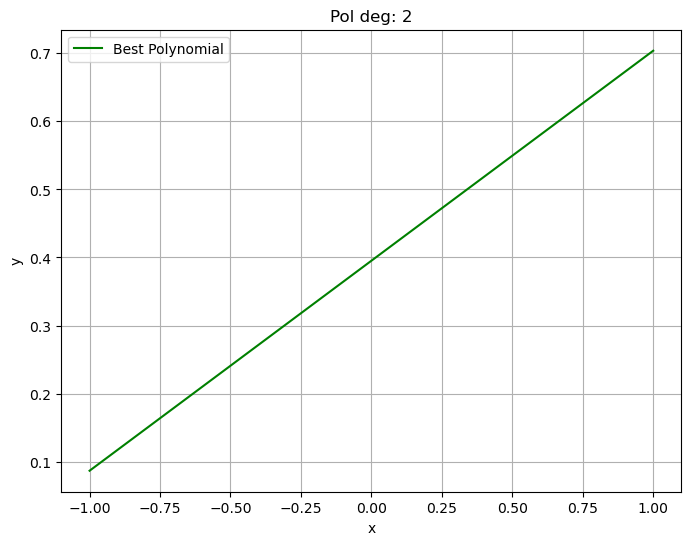

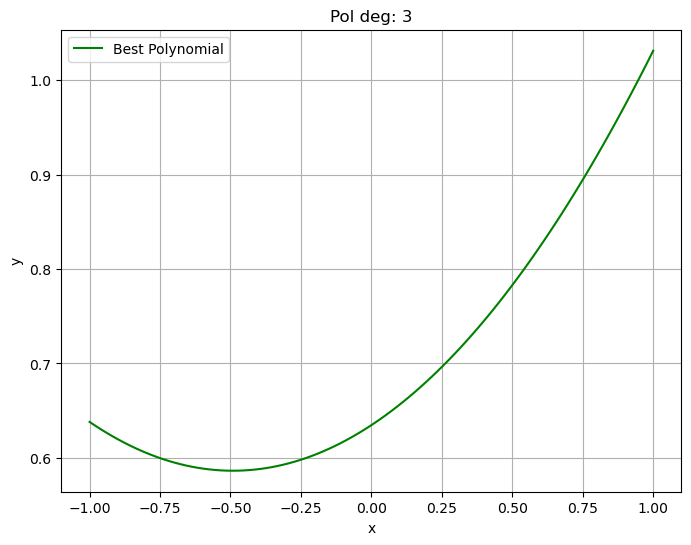

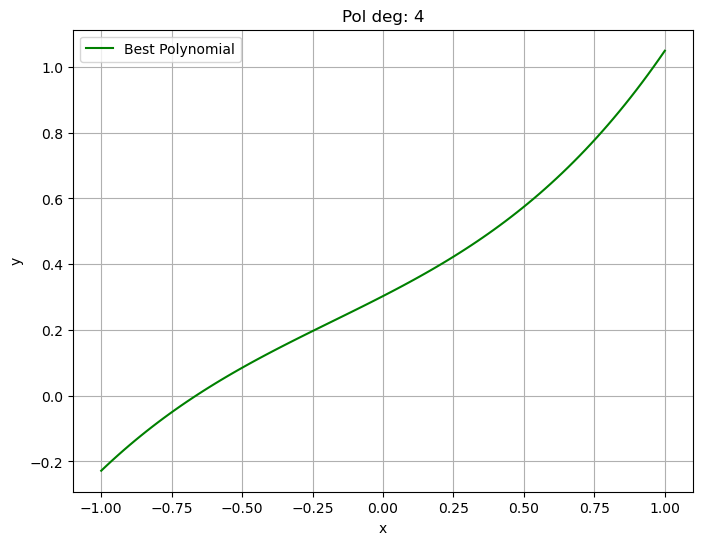

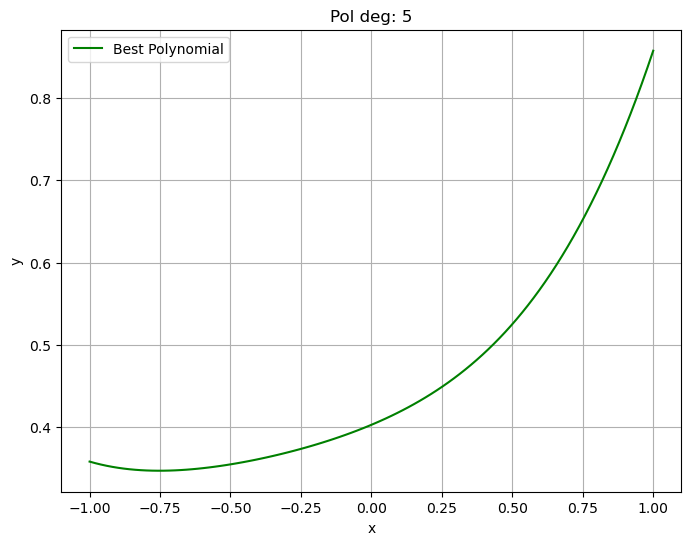

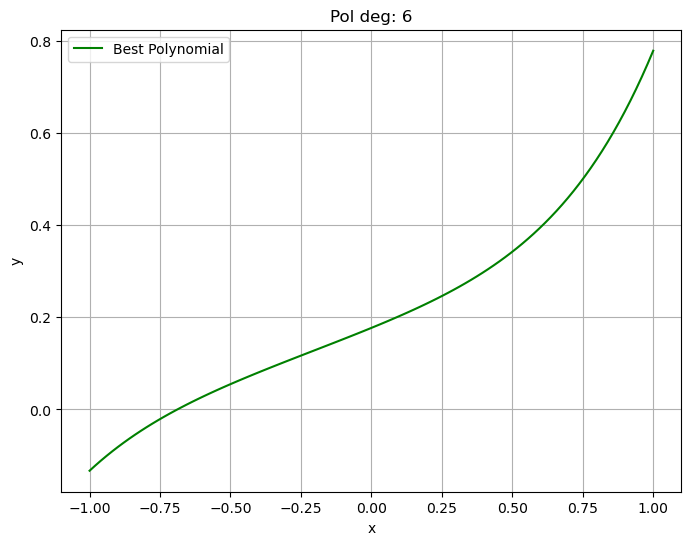

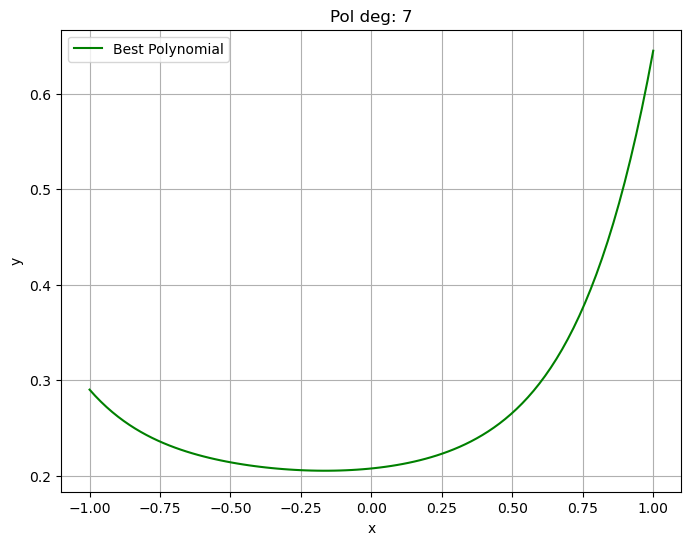

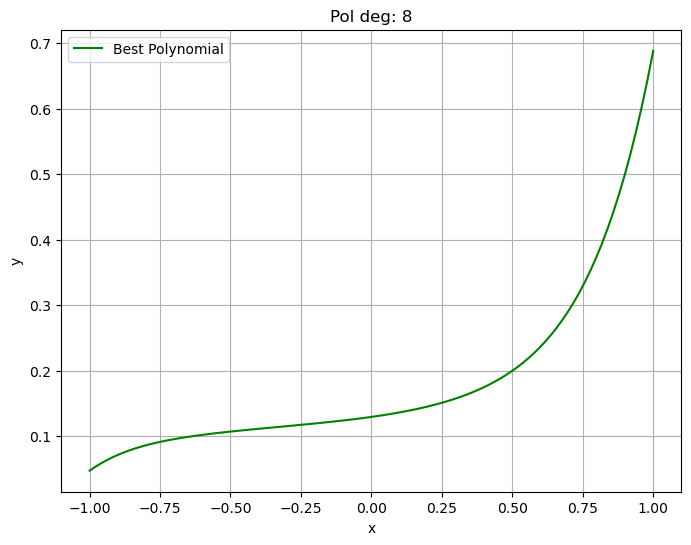

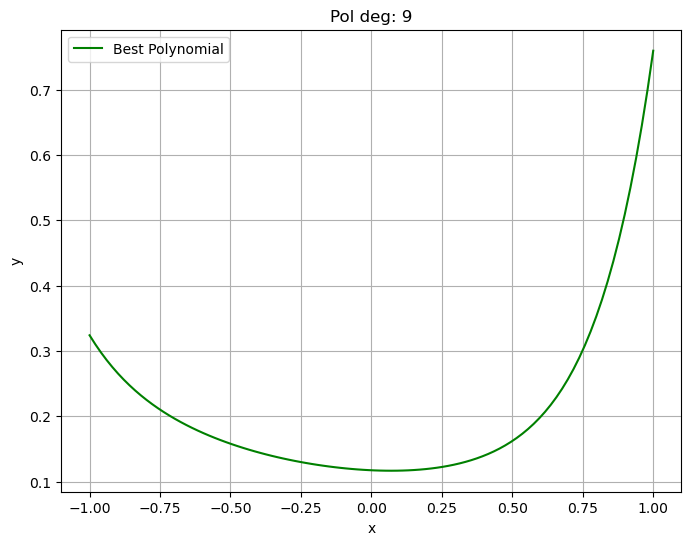

In [174]:
X_vals = np.linspace(-1, 1, 100)

for t in range(9):
    y_vals = bs[t] + np.polyval(ws[t], X_vals)
    plt.figure(figsize=(8, 6))
    plt.plot(X_vals, y_vals, label='Best Polynomial', color='g')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Pol deg: {t + 1}')
    plt.legend()
    plt.grid(True)
    plt.show()